* Turn the warning off: 
~~~~
options(warn=-1)
~~~~
* Turn the warning back on: 
~~~~
options(warn=0)
~~~~
* reference: https://stackoverflow.com/questions/16194212/how-to-suppress-warnings-globally-in-an-r-script

In [1]:
options(warn=-1)

## First step is getting the correlationship between those variables. 

In [2]:
#library(randomForest)
library(rms)
data <- read.csv('J:\\EECS_6414\\Data\\TEST_DATASET2\\kernel_cpt_dts_author.csv')# , stringsAsFactors=FALSE
# print(
# 
#         #"cmp_tier unique: ", 
#     unique(data["cmp_tier"])
# )
# print(
# 
#         #"scpt_tier unique: ", 
#         unique(data["scpt_tier"])
# 
# )
# print(
# 
#         #"dsc_tier unique: ", 
#         unique(data["dsc_tier"])
# 
# )
# data[data=="novice"] <- 1
# data[data=="contributor"] <- 2
# data[data=="expert"] <- 3
# data[data=="master"] <- 4
# data[data=="grandmaster"] <- 5

col_name <- names(data)
env_vars <- col_name
reject_vars <- c(#"kernel_datasets", # because they are all 1, so we can only get NaN. 
                 "kernel", "author" 
                 #"competition", "organization" # unnecessary variables. 
                 )
env_vars <- env_vars[!(env_vars %in% reject_vars)]
for (env in env_vars){
   print(paste(env, "+"))
}

Loading required package: Hmisc
Loading required package: lattice
Loading required package: survival
Loading required package: Formula
Loading required package: ggplot2

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units

Loading required package: SparseM

Attaching package: 'SparseM'

The following object is masked from 'package:base':

    backsolve



[1] "dataSources +"
[1] "versions +"
[1] "forks +"
[1] "comments +"
[1] "views +"
[1] "votes +"
[1] "competitions +"
[1] "competition_size_ttl +"
[1] "competition_size_avg +"
[1] "competition_size_max +"
[1] "competition_size_min +"
[1] "competition_discussion_ttl +"
[1] "competition_discussion_avg +"
[1] "competition_discussion_max +"
[1] "competition_discussion_min +"
[1] "competition_competitor_ttl +"
[1] "competition_competitor_avg +"
[1] "competition_competitor_max +"
[1] "competition_competitor_min +"
[1] "datasets +"
[1] "dataset_size_ttl +"
[1] "dataset_size_avg +"
[1] "dataset_size_max +"
[1] "dataset_size_min +"
[1] "dataset_discussion_ttl +"
[1] "dataset_discussion_avg +"
[1] "dataset_discussion_max +"
[1] "dataset_discussion_min +"
[1] "dataset_kernel_ttl +"
[1] "dataset_kernel_avg +"
[1] "dataset_kernel_max +"
[1] "dataset_kernel_min +"
[1] "dataset_download_ttl +"
[1] "dataset_download_avg +"
[1] "dataset_download_max +"
[1] "dataset_download_min +"
[1] "dataset_view_ttl 

png 
  2

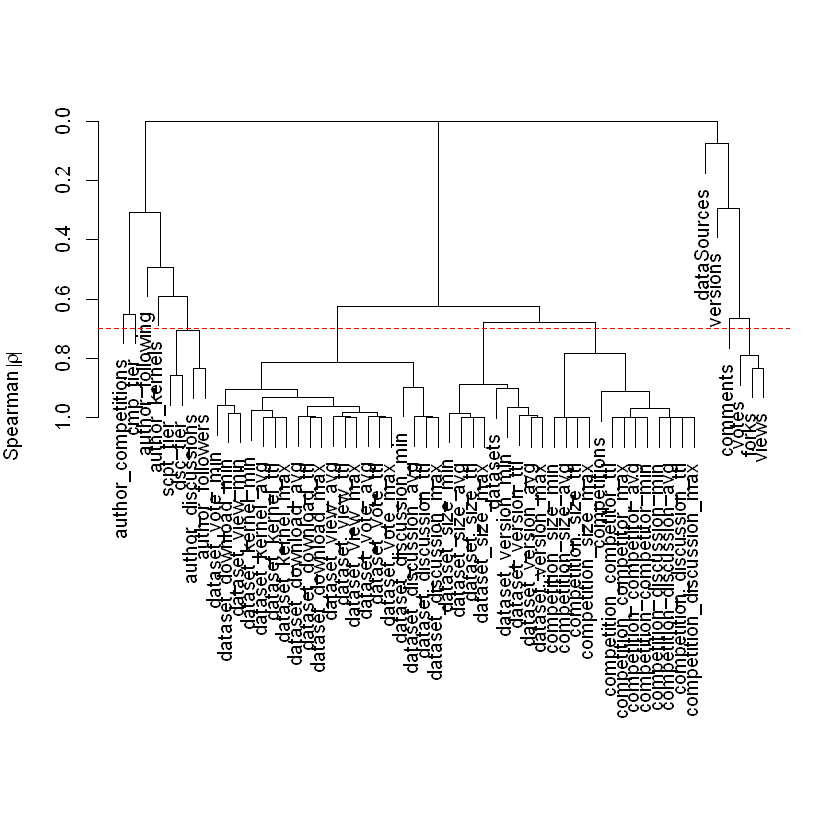

In [3]:
vcobj = varclus(~ 
                dataSources +
                versions +
                forks +
                comments +
                views +
                votes +
                competitions +
                competition_size_ttl +
                competition_size_avg +
                competition_size_max +
                competition_size_min +
                competition_discussion_ttl +
                competition_discussion_avg +
                competition_discussion_max +
                competition_discussion_min +
                competition_competitor_ttl +
                competition_competitor_avg +
                competition_competitor_max +
                competition_competitor_min +
                datasets +
                dataset_size_ttl +
                dataset_size_avg +
                dataset_size_max +
                dataset_size_min +
                dataset_discussion_ttl +
                dataset_discussion_avg +
                dataset_discussion_max +
                dataset_discussion_min +
                dataset_kernel_ttl +
                dataset_kernel_avg +
                dataset_kernel_max +
                dataset_kernel_min +
                dataset_download_ttl +
                dataset_download_avg +
                dataset_download_max +
                dataset_download_min +
                dataset_view_ttl +
                dataset_view_avg +
                dataset_view_max +
                dataset_view_min +
                dataset_vote_ttl +
                dataset_vote_avg +
                dataset_vote_max +
                dataset_vote_min +
                dataset_version_ttl +
                dataset_version_avg +
                dataset_version_max +
                dataset_version_min +
                author_competitions +
                cmp_tier +
                author_kernels +
                scpt_tier +
                author_discussions +
                dsc_tier +
                author_followers +
                author_following,
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation.pdf", width = 15, height = 15)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

# reject variables that closely related to each other. For now, we don't do this thing. 
# reject_vars <- c()
# env_vars <- env_vars[!(env_vars %in% reject_vars)]

In [4]:
# write(vcobj, file = "correlation_data.csv")
vcobj

varclus(x = ~dataSources + versions + forks + comments + views + 
    votes + competitions + competition_size_ttl + competition_size_avg + 
    competition_size_max + competition_size_min + competition_discussion_ttl + 
    competition_discussion_avg + competition_discussion_max + 
    competition_discussion_min + competition_competitor_ttl + 
    competition_competitor_avg + competition_competitor_max + 
    competition_competitor_min + datasets + dataset_size_ttl + 
    dataset_size_avg + dataset_size_max + dataset_size_min + 
    dataset_discussion_ttl + dataset_discussion_avg + dataset_discussion_max + 
    dataset_discussion_min + dataset_kernel_ttl + dataset_kernel_avg + 
    dataset_kernel_max + dataset_kernel_min + dataset_download_ttl + 
    dataset_download_avg + dataset_download_max + dataset_download_min + 
    dataset_view_ttl + dataset_view_avg + dataset_view_max + 
    dataset_view_min + dataset_vote_ttl + dataset_vote_avg + 
    dataset_vote_max + dataset_vote_min + dat

In [5]:
# reject_vars <- c("scpt_tier",  "dsc_tier",  "author_discussions", 
                 
#                  "dataset_vote_min", "dataset_download_min", "dataset_view_min", "dataset_kernel_min", "dataset_kernel_avg", "dataset_kernel_ttl", 
#                  "dataset_kernel_max", "dataset_download_avg", "dataset_download_ttl", "dataset_download_max", "dataset_view_avg", "dataset_view_ttl", 
#                  "dataset_view_max", "dataset_vote_avg", "dataset_vote_ttl", "dataset_vote_max", "dataset_discussion_min", "dataset_discussion_avg", 
#                  "dataset_discussion_ttl", 
#                  "", "", "", "", "", "", 
#                  "", "", "", "", "", "", 
#                  "", "", "", "", "", "", 
#                  "", "", "", "", "", "", 
#                  "", "", "", "", "", "", 
#                  "", "", "", "", "", "", 
#                  "", "", "", "", "", "", 
#                  "", "", "", "", "", "", 
#                  "", "", "", "", "", "", 
#                  "", "", "", "", "", "", 
                 
#                  "competition_discussion", "forks", 
#                  "comments"
#                  )
# env_vars <- env_vars[!(env_vars %in% reject_vars)]

env_vars <- c("author_competitions", "cmp_tier", "author_following",
             "author_kernels", "author_followers", "dataset_discussion_max",
             "dataset_version_max", "competition_discussion_max", "dataSources",
             "versions","forks"# "views", "comments", 
             )
for (env in env_vars){
   print(paste(env, "+"))
}

[1] "author_competitions +"
[1] "cmp_tier +"
[1] "author_following +"
[1] "author_kernels +"
[1] "author_followers +"
[1] "dataset_discussion_max +"
[1] "dataset_version_max +"
[1] "competition_discussion_max +"
[1] "dataSources +"
[1] "versions +"
[1] "forks +"


png 
  2

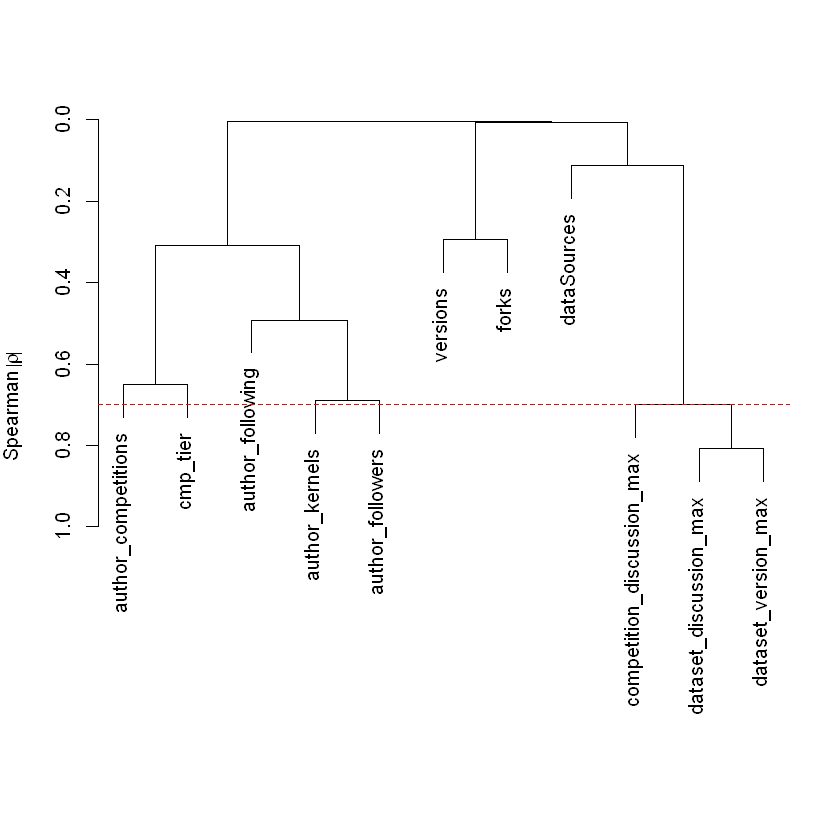

In [6]:
vcobj = varclus(~ 
                author_competitions +
                cmp_tier +
                author_following +
                author_kernels +
                author_followers +
                dataset_discussion_max +
                dataset_version_max +
                competition_discussion_max +
                dataSources +
                versions+ forks# + views + comments 
                ,
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation1.pdf", width = 11, height = 8.5)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

# reject variables that closely related to each other. For now, we don't do this thing. 
reject_vars <- c()
env_vars <- env_vars[!(env_vars %in% reject_vars)]

png 
  2

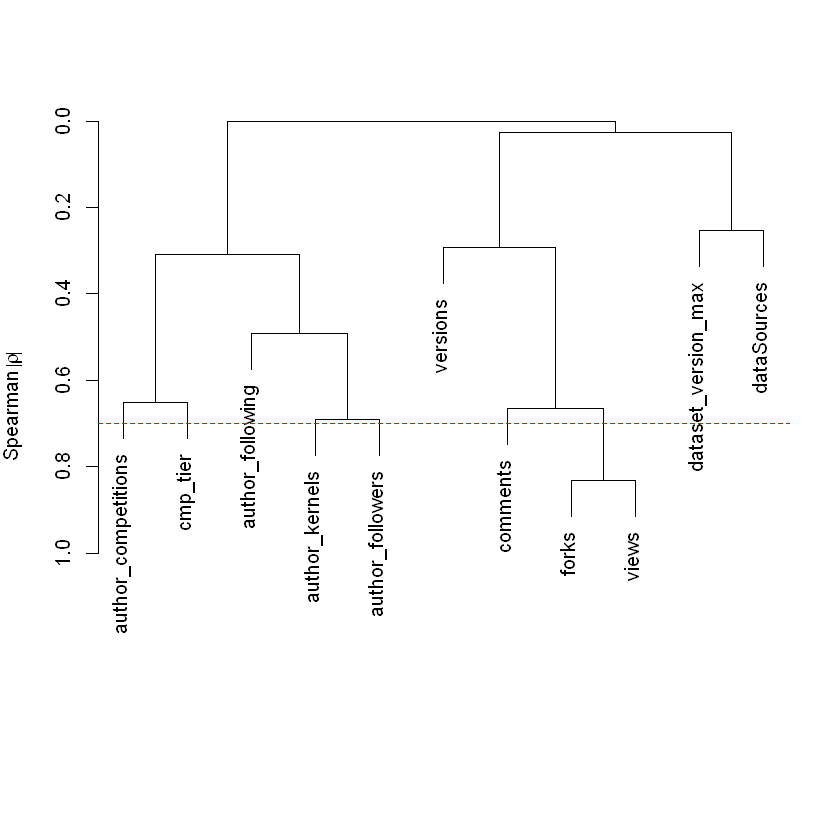

In [7]:
reject_vars <- c(#"comments", 
                 "competition_discussion_max", 
                 "dataset_discussion_max"
                 #"scpt_tier"
                 )
env_vars <- env_vars[!(env_vars %in% reject_vars)]

vcobj = varclus(~ 
                author_competitions +
                cmp_tier +
                author_following +
                author_kernels +
                author_followers +
                #dataset_discussion_max +
                dataset_version_max +
                #competition_discussion_max +
                dataSources +
                versions + forks + comments + views
                ,
                
                data = data, 
                
                similarity = "spearman",
                
                trans = "abs"
)

pdf(file="correlation2.pdf", width = 11, height = 8.5)
plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)
dev.off()

plot(vcobj)
thresh = 0.7
abline (h = 1 - thresh, col = "red", lty = 2)

In [8]:
vcobj

varclus(x = ~author_competitions + cmp_tier + author_following + 
    author_kernels + author_followers + dataset_version_max + 
    dataSources + versions + forks + comments + views, similarity = "spearman", 
    data = data, trans = "abs")


Similarity matrix (|Spearman rho|)

                    author_competitions cmp_tier author_following
author_competitions                1.00     0.65             0.31
cmp_tier                           0.65     1.00             0.34
author_following                   0.31     0.34             1.00
author_kernels                     0.42     0.38             0.49
author_followers                   0.47     0.52             0.60
dataset_version_max                0.27     0.21             0.03
dataSources                        0.09     0.05             0.07
versions                           0.01     0.02             0.01
forks                              0.18     0.17             0.04
comments                           0.13     0.18            

In [9]:
env_vars

[1] "author_competitions" "cmp_tier"            "author_following"   
[4] "author_kernels"      "author_followers"    "dataset_version_max"
[7] "dataSources"         "versions"            "forks"

## Second Step is to devide the training set and testing set

random forest model fitting referece: https://www.blopig.com/blog/2017/04/a-very-basic-introduction-to-random-forests-using-r/

In [10]:
env_vars = append(env_vars, "votes")
data_lean = data[env_vars]

In [11]:
head(data_lean, 5)

author_competitions,cmp_tier,author_following,author_kernels,author_followers,dataset_version_max,dataSources,versions,forks,votes
9,4,12,2,6,0,1,7,26,17
4,2,19,124,38,2,1,14,17,6
4,2,19,124,38,2,1,28,150,64
4,2,19,124,38,0,1,8,16,5
10,3,13,3,3,0,1,4,16,12


### regression

In [12]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(data_lean))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(data_lean)), size = smp_size)

train <- data_lean[train_ind, ]
test <- data_lean[-train_ind, ]

#import the package
library(randomForest)
# Perform training:
rf_classifier1 = randomForest(votes ~ ., data=train, ntree=100, mtry=2, importance=TRUE)
rf_classifier1

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:ggplot2':

    margin




Call:
 randomForest(formula = votes ~ ., data = train, ntree = 100,      mtry = 2, importance = TRUE) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 2

          Mean of squared residuals: 5973.466
                    % Var explained: 48.18

In [13]:
importance(rf_classifier1)

,%IncMSE,IncNodePurity
author_competitions,5.879392,3823799.5
cmp_tier,2.421941,778431.4
author_following,2.315846,4503930.3
author_kernels,4.600976,5538287.7
author_followers,3.151932,6165419.5
dataset_version_max,4.239233,2153340.5
dataSources,1.938764,1542373.9
versions,2.754362,10211781.5
forks,13.031884,29335682.2


### binary classification: 

This step is used for generating the binary label. 

In [14]:
summary(data_lean)

 author_competitions    cmp_tier     author_following author_kernels    
 Min.   :  0.000     Min.   :1.000   Min.   :  0.00   Min.   :    0.00  
 1st Qu.:  0.000     1st Qu.:2.000   1st Qu.:  0.00   1st Qu.:    3.00  
 Median :  3.000     Median :2.000   Median :  3.00   Median :    9.00  
 Mean   :  9.353     Mean   :2.063   Mean   : 15.76   Mean   :   52.44  
 3rd Qu.: 10.000     3rd Qu.:2.000   3rd Qu.: 17.00   3rd Qu.:   29.00  
 Max.   :146.000     Max.   :5.000   Max.   :376.00   Max.   :10072.00  
 author_followers dataset_version_max  dataSources        versions      
 Min.   :   0.0   Min.   :  0.000     Min.   : 0.000   Min.   :   0.00  
 1st Qu.:   1.0   1st Qu.:  0.000     1st Qu.: 1.000   1st Qu.:   3.00  
 Median :   6.0   Median :  0.000     Median : 1.000   Median :   7.00  
 Mean   : 151.1   Mean   :  3.512     Mean   : 1.127   Mean   :  14.31  
 3rd Qu.:  51.0   3rd Qu.:  2.000     3rd Qu.: 1.000   3rd Qu.:  15.00  
 Max.   :2743.0   Max.   :400.000     Max.   :15.00

In [15]:
# delete column: votes
data_classification <- data_lean
data_classification$high_vote[data_classification$votes >= 10] = TRUE
data_classification$high_vote[data_classification$votes < 10] = FALSE
data_classification<- data_classification[, -10]

In [16]:
head(data_classification)

author_competitions,cmp_tier,author_following,author_kernels,author_followers,dataset_version_max,dataSources,versions,forks,high_vote
9,4,12,2,6,0,1,7,26,TRUE
4,2,19,124,38,2,1,14,17,FALSE
4,2,19,124,38,2,1,28,150,TRUE
4,2,19,124,38,0,1,8,16,FALSE
10,3,13,3,3,0,1,4,16,TRUE
10,3,13,3,3,1,1,8,3,FALSE


In [17]:
summary(data_classification)

 author_competitions    cmp_tier     author_following author_kernels    
 Min.   :  0.000     Min.   :1.000   Min.   :  0.00   Min.   :    0.00  
 1st Qu.:  0.000     1st Qu.:2.000   1st Qu.:  0.00   1st Qu.:    3.00  
 Median :  3.000     Median :2.000   Median :  3.00   Median :    9.00  
 Mean   :  9.353     Mean   :2.063   Mean   : 15.76   Mean   :   52.44  
 3rd Qu.: 10.000     3rd Qu.:2.000   3rd Qu.: 17.00   3rd Qu.:   29.00  
 Max.   :146.000     Max.   :5.000   Max.   :376.00   Max.   :10072.00  
 author_followers dataset_version_max  dataSources        versions      
 Min.   :   0.0   Min.   :  0.000     Min.   : 0.000   Min.   :   0.00  
 1st Qu.:   1.0   1st Qu.:  0.000     1st Qu.: 1.000   1st Qu.:   3.00  
 Median :   6.0   Median :  0.000     Median : 1.000   Median :   7.00  
 Mean   : 151.1   Mean   :  3.512     Mean   : 1.127   Mean   :  14.31  
 3rd Qu.:  51.0   3rd Qu.:  2.000     3rd Qu.: 1.000   3rd Qu.:  15.00  
 Max.   :2743.0   Max.   :400.000     Max.   :15.00

Divide the training and testing data

In [18]:
## 75% of the sample size
smp_size <- floor(0.75 * nrow(data_classification))

## set the seed to make your partition reproducible
set.seed(123)
train_ind <- sample(seq_len(nrow(data_classification)), size = smp_size)

train <- data_classification[train_ind, ]
test <- data_classification[-train_ind, ]


Call:
 randomForest(formula = as.factor(high_vote) ~ ., data = train,      ntree = 100, mtry = 2, importance = TRUE) 
               Type of random forest: classification
                     Number of trees: 100
No. of variables tried at each split: 2

        OOB estimate of  error rate: 17%
Confusion matrix:
      FALSE TRUE class.error
FALSE  2569  506   0.1645528
TRUE    560 2636   0.1752190

Then we fit the model.

In [ ]:
#import the package
library(randomForest)
# Perform training:
rf_classifier2 = randomForest(as.factor(high_vote) ~ ., data=train, ntree=100, mtry=2, importance=TRUE)
# because of the as.factor(...), randomforest can fit a classification model. 
rf_classifier2

In [19]:
importance(rf_classifier2)

,FALSE,TRUE,MeanDecreaseAccuracy,MeanDecreaseGini
author_competitions,14.476541,10.917248,20.120907,199.77595
cmp_tier,11.899780,2.383459,11.144010,71.09769
author_following,16.365730,13.002983,21.130544,192.12942
author_kernels,21.155842,19.728430,33.271168,273.33359
author_followers,20.206074,17.762103,30.096736,266.46815
dataset_version_max,2.227815,9.447745,10.344788,138.46368
dataSources,5.749183,7.895552,8.998782,55.96500
versions,12.159422,15.886995,19.152605,330.19126
forks,99.318637,74.188738,103.670226,1379.66478


This is AUC. If the stackoverflow gave me the right answer. 

In [ ]:
# import the library that needed in calculating the AUC. 
library(pROC)
library(ROCR)

In [18]:
# https://stackoverflow.com/questions/46776944/how-to-calculate-randomforest-training-auc-in-r
# the train AUC
rf_p_train <- predict(rf_classifier2, type="prob")[,2]
rf_pr_train <- prediction(rf_p_train, train$high_vote)
r_auc_train <- performance(rf_pr_train, measure = "auc")@y.values[[1]] 
r_auc_train

Type 'citation("pROC")' for a citation.

Attaching package: 'pROC'

The following objects are masked from 'package:stats':

    cov, smooth, var

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



[1] 0.9124413

In [24]:
#https://stats.stackexchange.com/questions/308645/why-does-randomforest-has-higher-test-auc-than-train-auc-is-this-possible
#the test AUC
rf_p_test <- predict(rf_classifier2, type="prob", newdata = test)[,2]
rf_pr_test <- prediction(rf_p_test, test$high_vote)
r_auc_test <- performance(rf_pr_test, measure = "auc")@y.values[[1]] 
r_auc_test

Loading required package: gplots

Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess



[1] 0.9232872

### Logistic Regression

In [26]:
library(rms)
fit <- lrm(high_vote ~ 
            author_competitions+
            cmp_tier+
            author_following+
            author_kernels+
            author_followers+
            dataset_version_max+
            dataSources+
            versions+
            forks
           ,
           data=train, x=T, y=T)

In [27]:
val <- validate(fit, B=1000)
AUC = 0.5 + val[1,1]/2
AUC_optimism_reduced = (0.5 + val[1,5]/2)
AUC_optimism = AUC - AUC_optimism_reduced
print(c("AUC"=AUC,"AUC_optimism"=AUC_optimism))


Divergence or singularity in 3 samples
         AUC AUC_optimism 
 0.701316127  0.001184745 


# wasted code

In [23]:
# https://stackoverflow.com/questions/30366143/how-to-compute-roc-and-auc-under-roc-after-training-using-caret-in-r

library(caret)
library(pROC)

test$high_vote <- factor(test$high_vote)
result.predicted.prob <- predict(rf_classifier2, test, type="prob") # Prediction

result.roc <- roc(test$high_vote) # Draw ROC curve.   , result.predicted.prob$versicolor
plot(result.roc, print.thres="best", print.thres.best.method="closest.topleft")

result.coords <- coords(result.roc, "best", best.method="closest.topleft", ret=c("threshold", "accuracy"))
print(result.coords)#to get threshold and accuracy

ERROR: Error in roc.default(test$high_vote): No valid data provided.


In [ ]:
# https://stackoverflow.com/questions/30366143/how-to-compute-roc-and-auc-under-roc-after-training-using-caret-in-r
library(ROCR)
predictions=as.vector(rf_classifier2$TRUE[,2])
pred=prediction(predictions,target)

perf_AUC=performance(pred,"auc") #Calculate the AUC value
AUC=perf_AUC@y.values[[1]]

perf_ROC=performance(pred,"tpr","fpr") #plot the actual ROC curve
plot(perf_ROC, main="ROC plot")
text(0.5,0.5,paste("AUC = ",format(AUC, digits=5, scientific=FALSE)))

In [25]:
install.packages("rms", repos = "http://cran.us.r-project.org")

Installing package into 'C:/Users/xmk233/Documents/R/win-library/3.5'
(as 'lib' is unspecified)


In [ ]:
# https://www.kaggle.com/c/15-071x-the-analytics-edge-competition-spring-2015/discussion/13535
PredTrain = predict(rf_classifier2)
ROCR = prediction(Train, varible)

In [ ]:
#https://stackoverflow.com/questions/30366143/how-to-compute-roc-and-auc-under-roc-after-training-using-caret-in-r
library(ROCR)
predictions=as.vector(rf_output$votes[,2])
pred=prediction(predictions,target)

perf_AUC=performance(pred,"auc") #Calculate the AUC value
AUC=perf_AUC@y.values[[1]]

perf_ROC=performance(pred,"tpr","fpr") #plot the actual ROC curve
plot(perf_ROC, main="ROC plot")
text(0.5,0.5,paste("AUC = ",format(AUC, digits=5, scientific=FALSE)))